/var/folders/89/lcfqp1fd2hn0qzdgwmz6hfk40000gn/T/ipykernel_802/2544970938.py:21: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, count in ethnicity_counts.iteritems():
/var/folders/89/lcfqp1fd2hn0qzdgwmz6hfk40000gn/T/ipykernel_802/2544970938.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('rainbow')


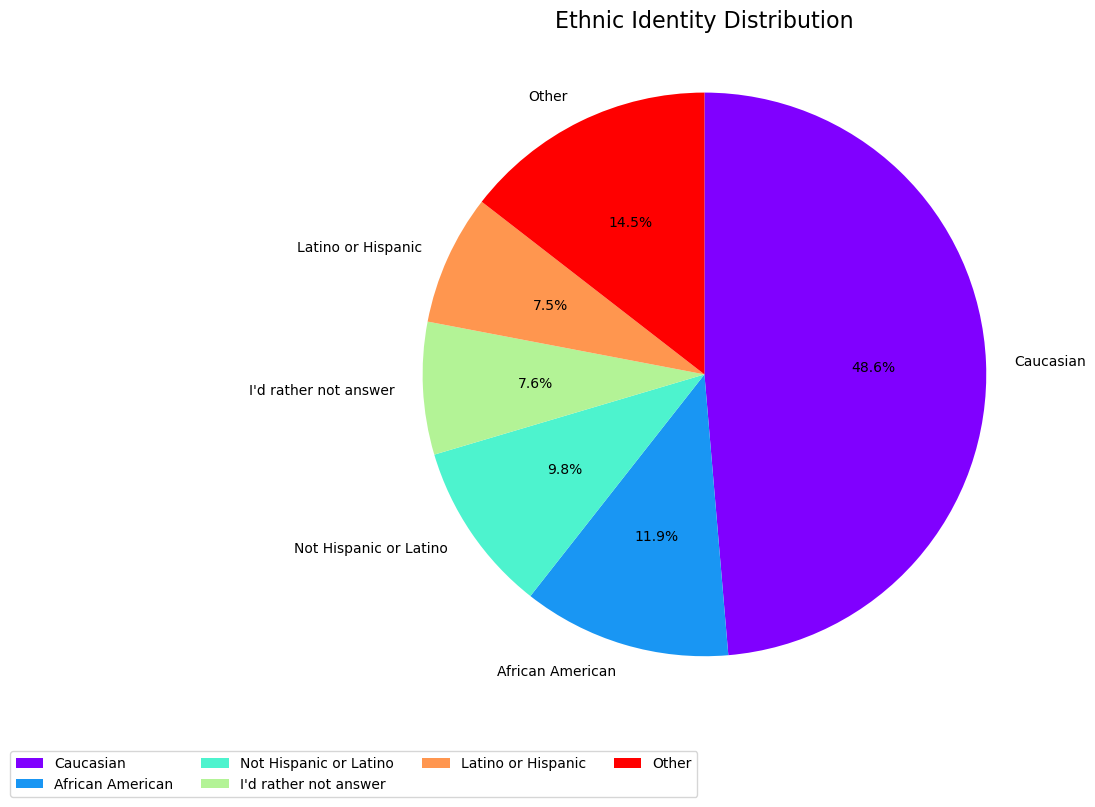

In [12]:
# DataFest 2023: Pie Chart
# Goal: Make a visually appealing pie chart using data that shows the percentage of clients per ethnic identity.
# We will be using the clients.csv file which contains object 'Clients' and attribute 'EthnicIdentity'
# This is our Plan B in case our Plan A (heatmap, wordcloud..) go sour.

import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt

# Extracting Data from Clients.csv
# --------------------------------------------------------------------------------------------------------------------
# Read clients.csv as a DF
clients_df = pd.read_csv('csv_files/clients.csv')

# Count number of Clients & Clients with a unique 'EthnicIdentity'(ex. there are x Caucasian clients)
ethnicity_counts = clients_df['EthnicIdentity'].value_counts() 
total_clients = len(clients_df)

# Loop through the count of each EthnicIdentity. Less popular EthnicIdentities that are <3% of clients go under 'Other'
other_count = 0
for index, count in ethnicity_counts.iteritems():          
    if count / total_clients < 0.03:
        other_count += count
        ethnicity_counts.drop(index, inplace=True)
ethnicity_counts['Other'] = other_count           


# Pie Chart
# --------------------------------------------------------------------------------------------------------------------
# Set up color map starting at purple and going clockwise to red in a rainbow pattern
cmap = plt.cm.get_cmap('rainbow')

# Plot the unique EthnicIdentities and their counts in a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ethnicity_counts.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, counterclock=False, cmap=cmap)

# Set title, legend, and remove ylabel
ax.set_title("Ethnic Identity Distribution", y=1.05, fontsize=16)
ax.legend(ethnicity_counts.index, loc='best', bbox_to_anchor=(0.5, -0.1), ncol=4)
ax.set_ylabel('')
ax.axis('equal')
plt.show()